In [34]:
# Project name : Regression analysis using solar power dataset

# Project timeline : 19th August, 2024 to 20th September, 2024

# Objective : The variable to be predicted is continuous (energy production). Therefore, this is an Regression project.
# The primary goal is to model energy production as a function of environmental variables

In [35]:
# Data Set Description

# The file solarpowergeneration.csv contains the data for this example.
# Here, the number of variables (columns) is 10, and the number of instances (rows) is 2920.
# We have the following variables for this analysis:
# •	distance_to_solar_noon, in radians.
# •	temperature, daily average temperature, in degrees Celsius.
# •	wind_direction, daily average wind direction, in degrees (0-360).
# •	wind_speed, daily average wind speed, in meters per second.
# •	sky_cover, on a five-step scale from 0 to 4, with 0 completely clear and 4 wholly covered.
# •	visibility, in kilometers.
# •	humidity, in percentage.
# •	average_wind_speed, average wind speed during the 3 hours de measure was taken in meters per second.
# •	average_pressure, average barometric pressure during the 3 hours the measure was taken in, in mercury inches.
# •	power_generated(Target), in Jules for each 3 hours

In [36]:
# Import the necessary libraries and loading the data set

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/content/solarpowergeneration.csv")
df



distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
2                   0.397172           69              28         7.5   
3                   0.165810           69              28         7.5   
4                   0.065553           69              28         7.5   
...                      ...          ...             ...         ...   
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
0             0        10.0        75                          8.0   
1             0        10.0        77                          5.0   
2             0        10.0        70                          0.0   
3             0        10.0        33                          0.0   
4             0        10.0        21                          3.0   
...         ...         ...       ...                          ...   
2915          4        10.0        75                         10.0   
2916          1        10.0        66                         15.0   
2917          2        10.0        68                         21.0   
2918          2        10.0        81                         17.0   
2919          1        10.0        81                         11.0   

      average-pressure-(period)  power-generated  
0                         29.82                0  
1                         29.85                0  
2                         29.89             5418  
3                         29.91            25477  
4                         29.89            30069  
...                         ...              ...  
2915                      29.93             6995  
2916                      29.91            29490  
2917                      29.88            17257  
2918                      29.87              677  
2919                      29.90                0  

[2920 rows x 10 columns]

In [37]:

# Exploratory data analysis

# Understanding the variables and their datatypes

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.2 KB


In [38]:

# Top 5 records

df.head()

distance-to-solar-noon  temperature  wind-direction  wind-speed  sky-cover  \
0                0.859897           69              28         7.5          0   
1                0.628535           69              28         7.5          0   
2                0.397172           69              28         7.5          0   
3                0.165810           69              28         7.5          0   
4                0.065553           69              28         7.5          0   

   visibility  humidity  average-wind-speed-(period)  \
0        10.0        75                          8.0   
1        10.0        77                          5.0   
2        10.0        70                          0.0   
3        10.0        33                          0.0   
4        10.0        21                          3.0   

   average-pressure-(period)  power-generated  
0                      29.82                0  
1                      29.85                0  
2                      29.89             5418  
3                      29.91            25477  
4                      29.89            30069

In [39]:

# Bottom 5 records

df.tail()

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
2915          4        10.0        75                         10.0   
2916          1        10.0        66                         15.0   
2917          2        10.0        68                         21.0   
2918          2        10.0        81                         17.0   
2919          1        10.0        81                         11.0   

      average-pressure-(period)  power-generated  
2915                      29.93             6995  
2916                      29.91            29490  
2917                      29.88            17257  
2918                      29.87              677  
2919                      29.90                0

In [40]:

# Analyzing variable statistics

df.describe()

distance-to-solar-noon  temperature  wind-direction   wind-speed  \
count             2920.000000  2920.000000     2920.000000  2920.000000   
mean                 0.503294    58.468493       24.953425    10.096986   
std                  0.298024     6.841200        6.915178     4.838185   
min                  0.050401    42.000000        1.000000     1.100000   
25%                  0.243714    53.000000       25.000000     6.600000   
50%                  0.478957    59.000000       27.000000    10.000000   
75%                  0.739528    63.000000       29.000000    13.100000   
max                  1.141361    78.000000       36.000000    26.600000   

         sky-cover   visibility     humidity  average-wind-speed-(period)  \
count  2920.000000  2920.000000  2920.000000                  2919.000000   
mean      1.987671     9.557705    73.513699                    10.129154   
std       1.411978     1.383884    15.077139                     7.261547   
min       0.000000     0.000000    14.000000                     0.000000   
25%       1.000000    10.000000    65.000000                     5.000000   
50%       2.000000    10.000000    77.000000                     9.000000   
75%       3.000000    10.000000    84.000000                    15.000000   
max       4.000000    10.000000   100.000000                    40.000000   

       average-pressure-(period)  power-generated  
count                2920.000000      2920.000000  
mean                   30.017760      6979.846233  
std                     0.142006     10312.336413  
min                    29.480000         0.000000  
25%                    29.920000         0.000000  
50%                    30.000000       404.000000  
75%                    30.110000     12723.500000  
max                    30.530000     36580.000000

In [41]:
# Checking for null values

df.isnull()

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                      False        False           False       False   
1                      False        False           False       False   
2                      False        False           False       False   
3                      False        False           False       False   
4                      False        False           False       False   
...                      ...          ...             ...         ...   
2915                   False        False           False       False   
2916                   False        False           False       False   
2917                   False        False           False       False   
2918                   False        False           False       False   
2919                   False        False           False       False   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
0         False       False     False                        False   
1         False       False     False                        False   
2         False       False     False                        False   
3         False       False     False                        False   
4         False       False     False                        False   
...         ...         ...       ...                          ...   
2915      False       False     False                        False   
2916      False       False     False                        False   
2917      False       False     False                        False   
2918      False       False     False                        False   
2919      False       False     False                        False   

      average-pressure-(period)  power-generated  
0                         False            False  
1                         False            False  
2                         False            False  
3                         False            False  
4                         False            False  
...                         ...              ...  
2915                      False            False  
2916                      False            False  
2917                      False            False  
2918                      False            False  
2919                      False            False  

[2920 rows x 10 columns]

In [42]:
df.isnull().sum()

# average-wind-speed-(period) is null for one record

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [43]:

# Filling null value with data

# We will take the mean of the average-wind-speed-(period) and fill up the null value
df = df.fillna(df['average-wind-speed-(period)'].median())

In [44]:

df.isnull().sum()

# No null values now

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

In [45]:
# Identifying categorical variables

df_categorical_features = df.select_dtypes(include='category')
df_categorical_features

# There are no categorical variables in the dataset so might not need one hot encoding or label encoding

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[2920 rows x 0 columns]

In [46]:
# Identify numerical columns in the dataset.

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')


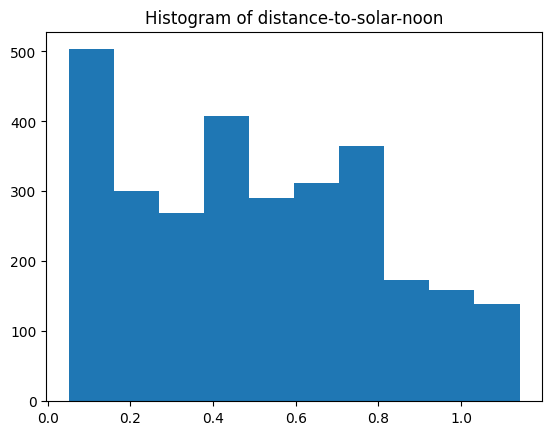

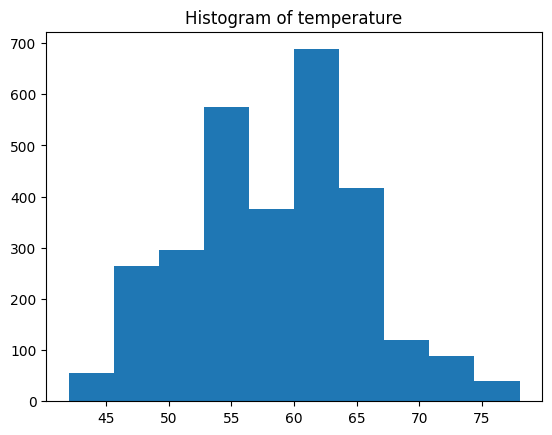

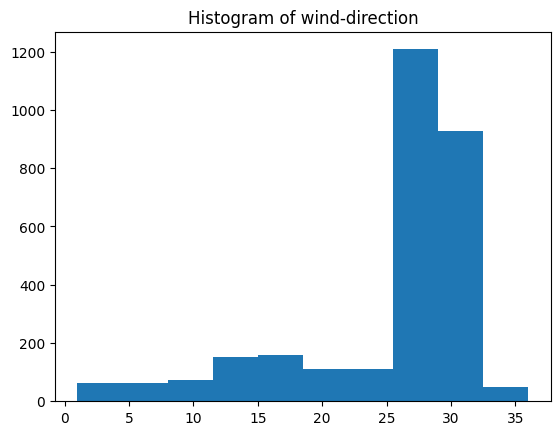

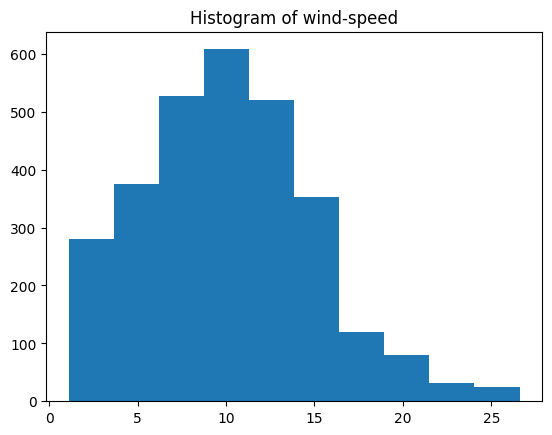

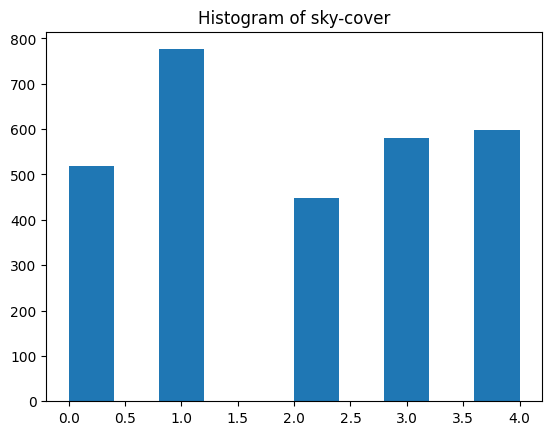

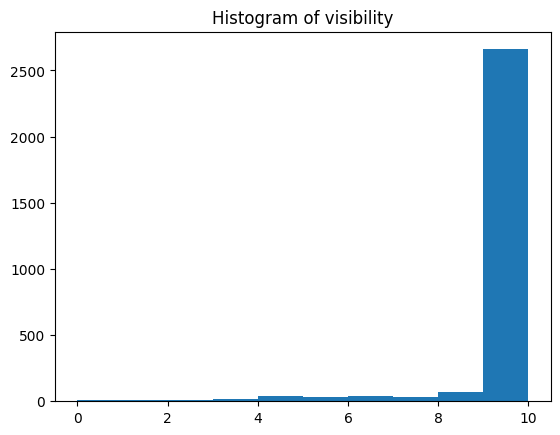

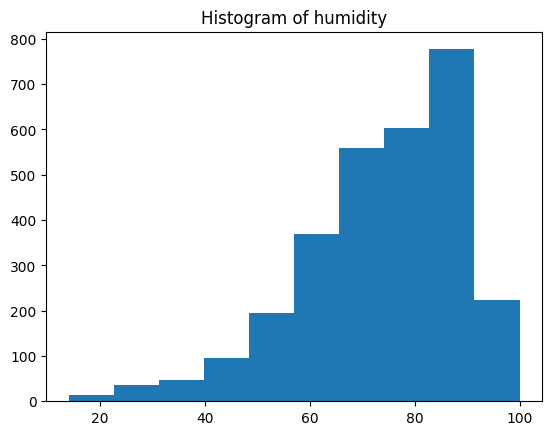

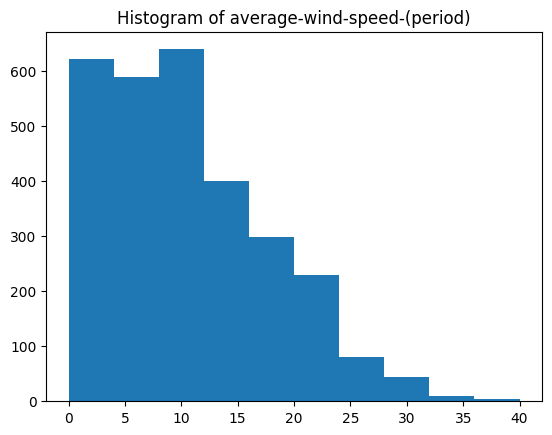

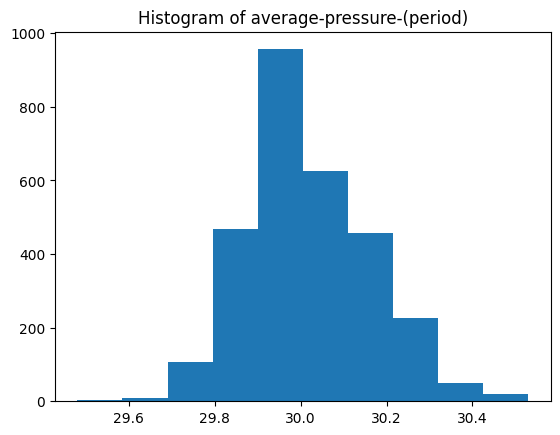

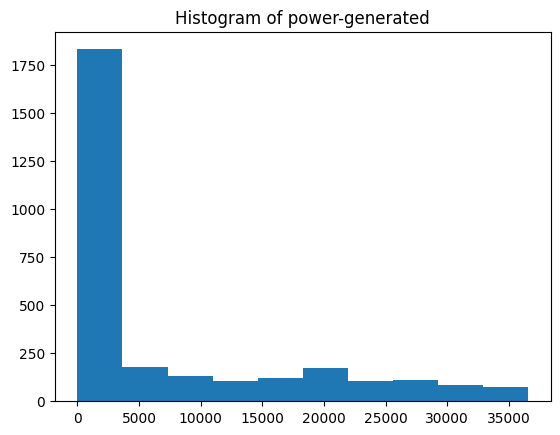

In [47]:
#Plotting histograms for each numerical column.

import matplotlib.pyplot as plt

# Plot histograms for each numerical column
for column in numerical_columns:
    plt.hist(df[column])
    plt.title(f"Histogram of {column}")
    plt.show()

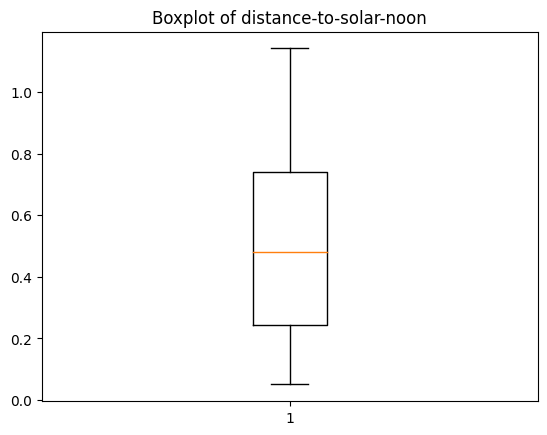

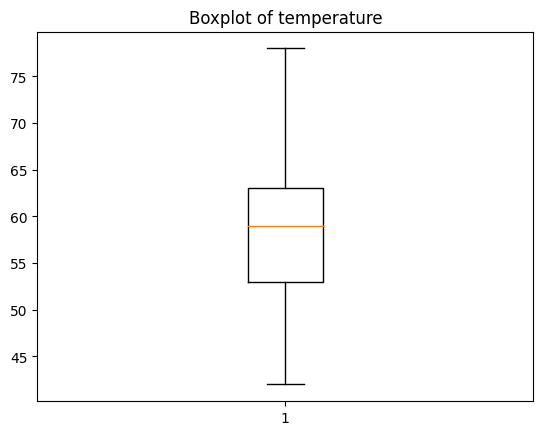

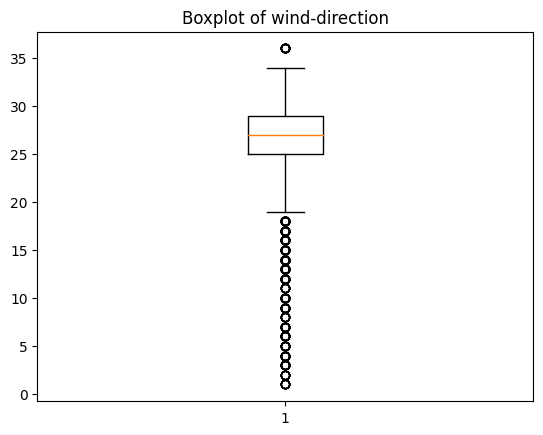

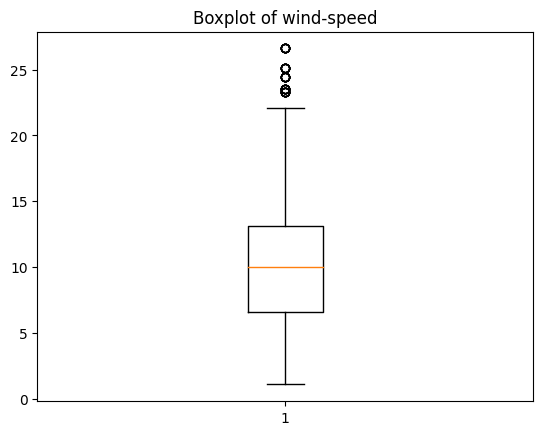

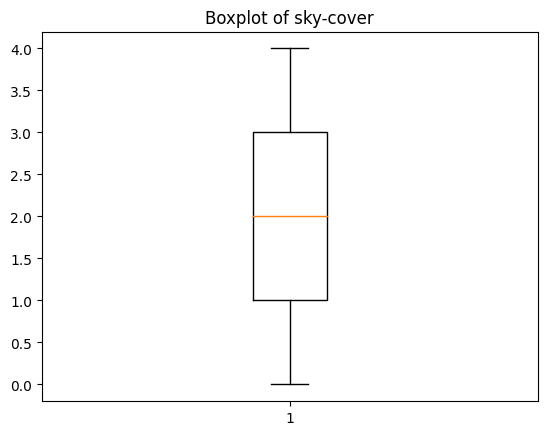

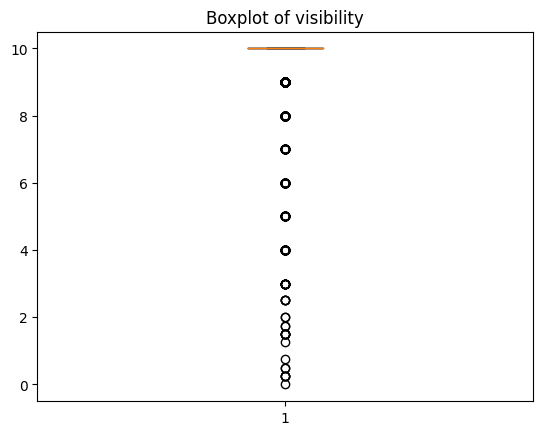

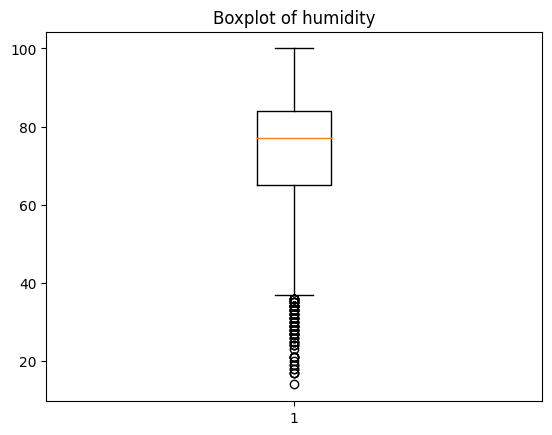

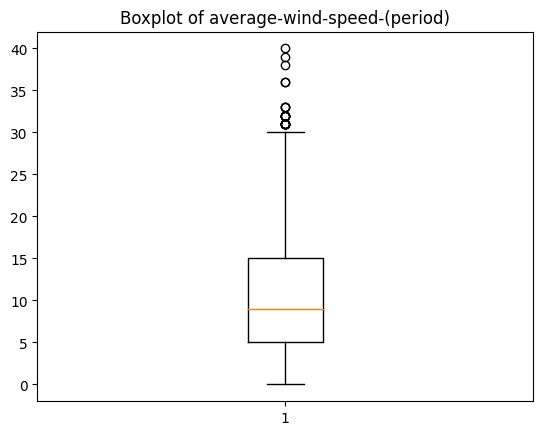

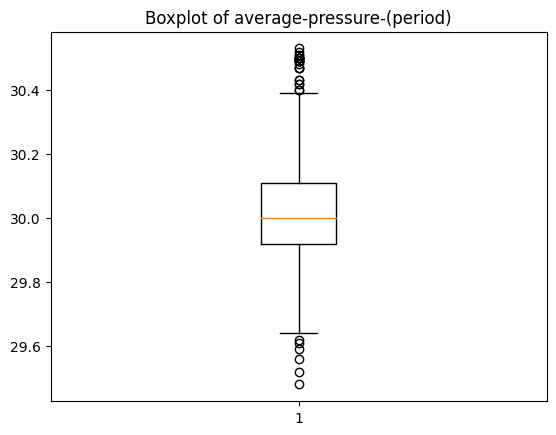

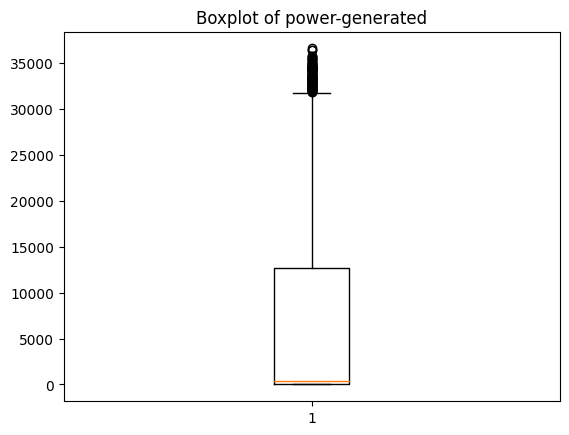

In [48]:
# Create boxplots for numerical variables

for column in numerical_columns:
    plt.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

In [49]:
# Calculate skewness for numerical columns
skewness = df.skew()

print('Skewness for numerical_columns:')
print(skewness)

Skewness for numerical_columns:
distance-to-solar-noon         0.211452
temperature                    0.125916
wind-direction                -1.629519
wind-speed                     0.416851
sky-cover                      0.080284
visibility                    -3.862446
humidity                      -0.955607
average-wind-speed-(period)    0.623168
average-pressure-(period)      0.441384
power-generated                1.307035
dtype: float64


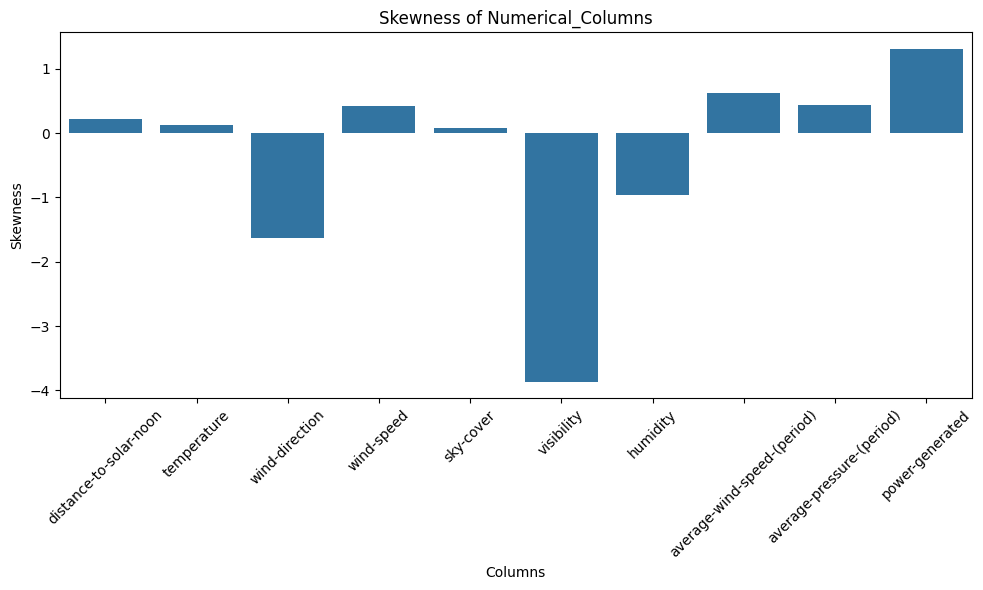

In [50]:
# Plotting the skewness of numerical columns
plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.index, y=skewness.values)
plt.title('Skewness of Numerical_Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Kurtosis for numerical_columns:
distance-to-solar-noon         -0.987306
temperature                    -0.287402
wind-direction                  1.856622
wind-speed                      0.078606
sky-cover                      -1.341456
visibility                     15.718494
humidity                        0.872219
average-wind-speed-(period)     0.016458
average-pressure-(period)       0.352309
power-generated                 0.342206
dtype: float64


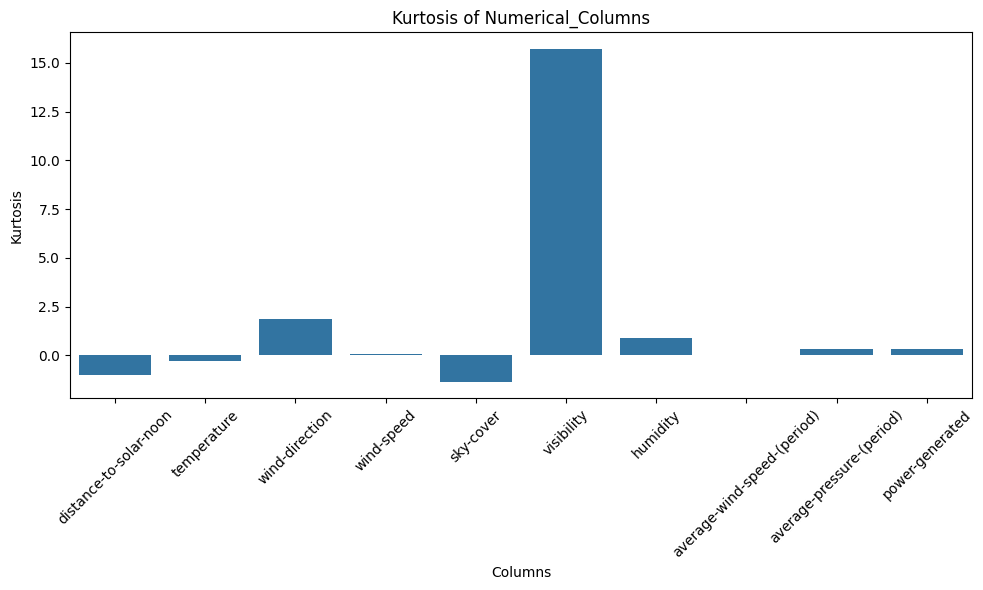

In [51]:
# Calculate kurtosis for numerical columns
kurtosis = df.kurtosis()

print('Kurtosis for numerical_columns:')
print(kurtosis)

# Plotting the kurtosis of numerical columns
plt.figure(figsize=(10, 6))
sns.barplot(x=kurtosis.index, y=kurtosis.values)
plt.title('Kurtosis of Numerical_Columns')
plt.xlabel('Columns')
plt.ylabel('Kurtosis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

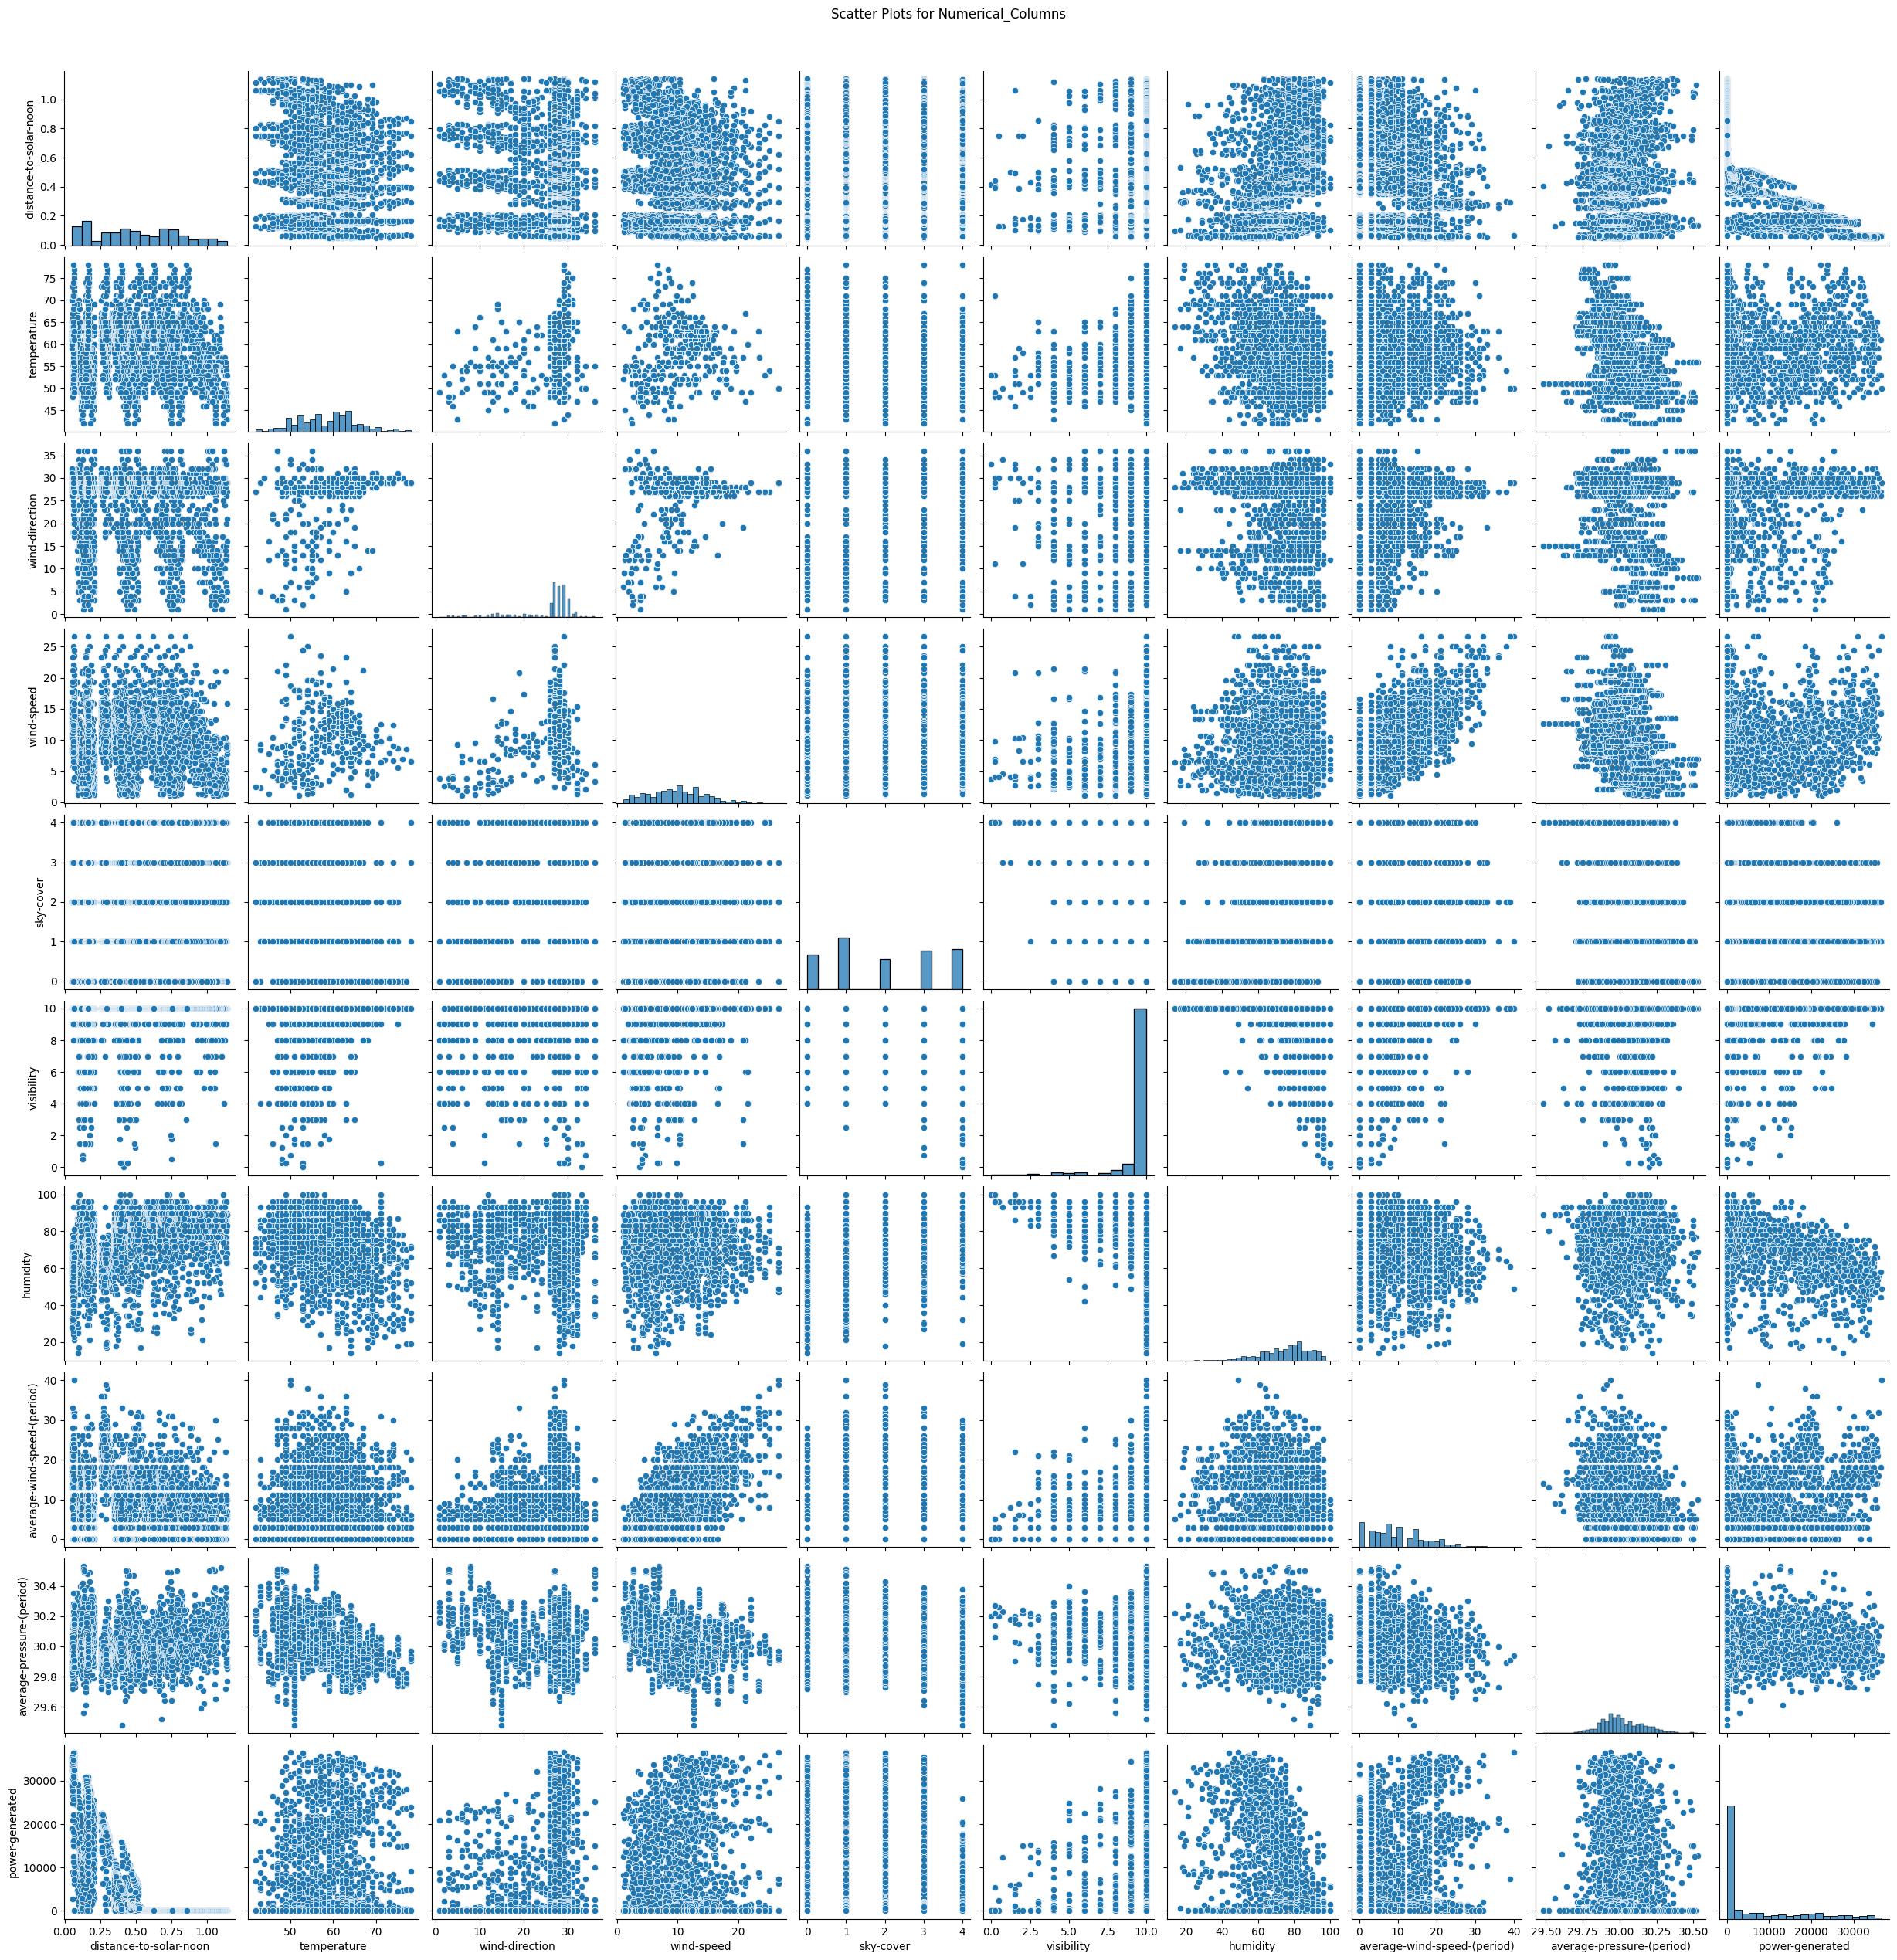

In [52]:

sns.pairplot(df)
plt.suptitle('Scatter Plots for Numerical_Columns', y=1.02)
plt.show()

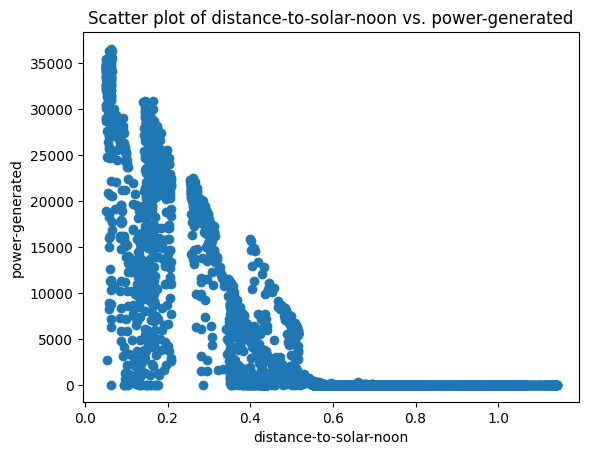

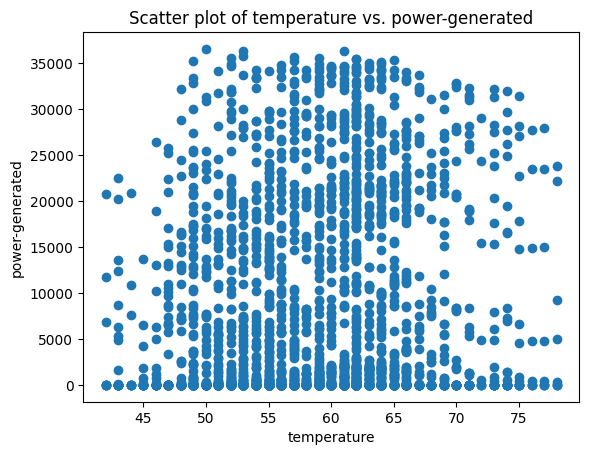

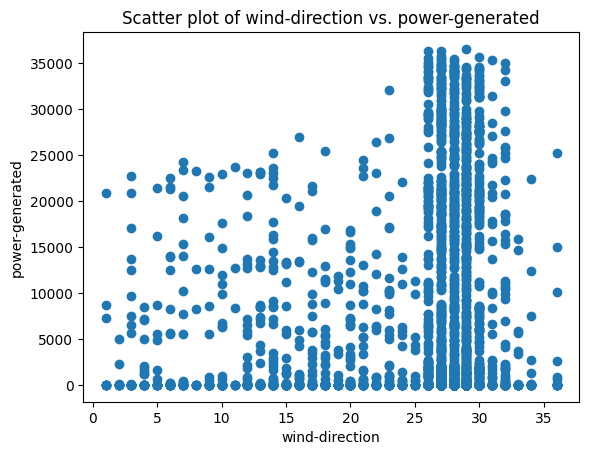

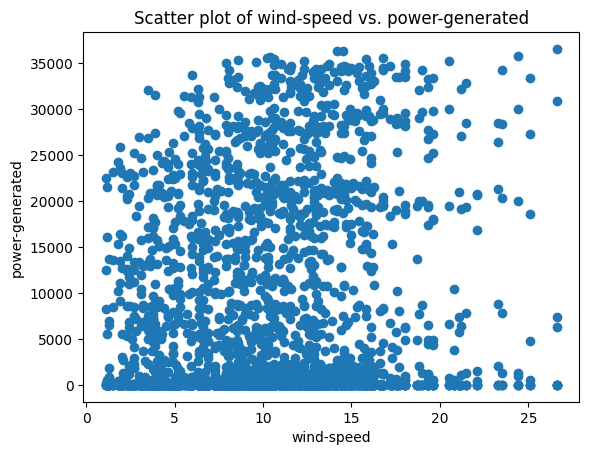

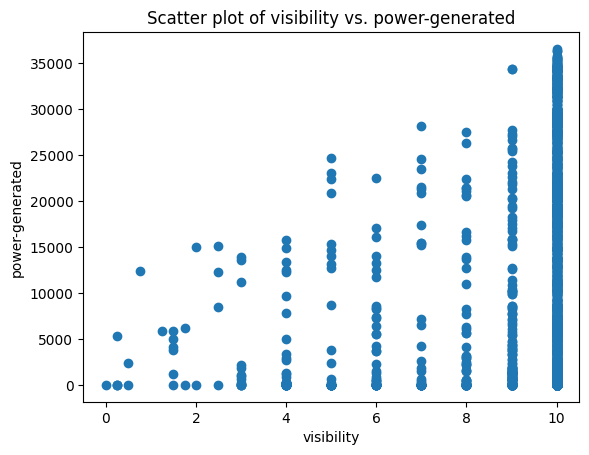

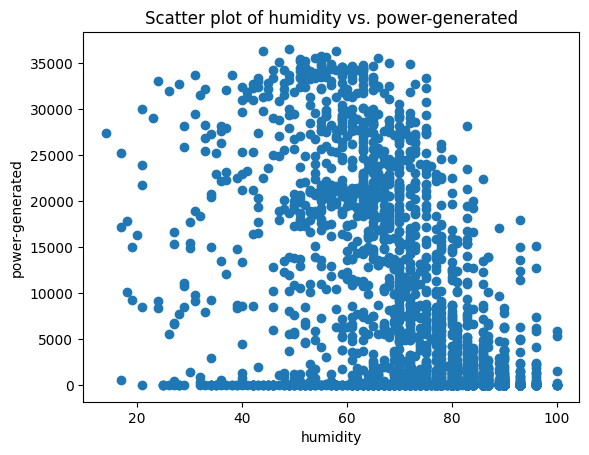

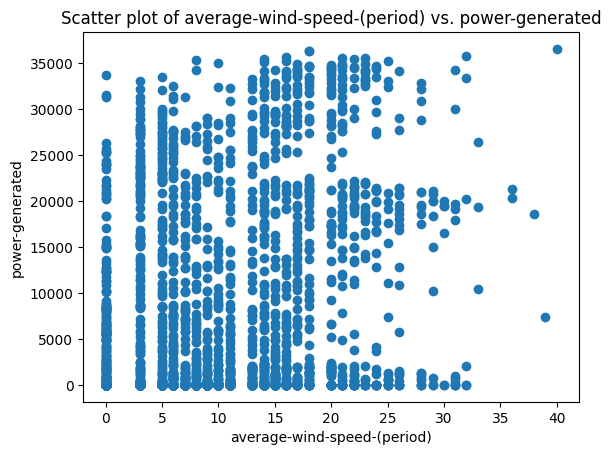

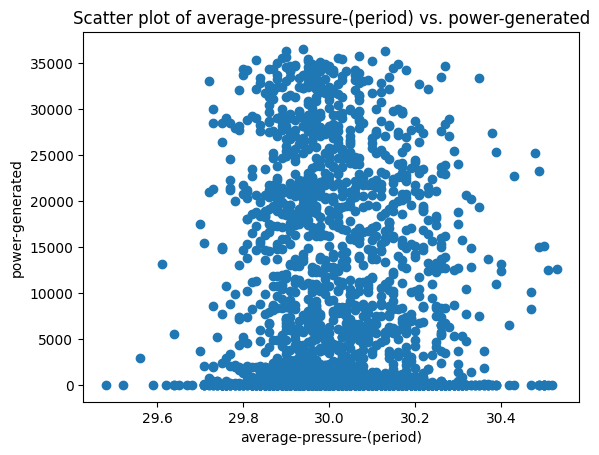

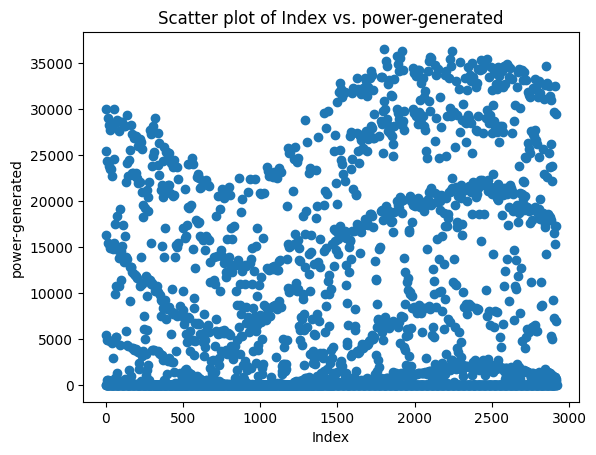

In [53]:
for Numerical_Columns in ['distance-to-solar-noon','temperature', 'wind-direction', 'wind-speed',
             'visibility', 'humidity', 'average-wind-speed-(period)',
            'average-pressure-(period)']:
    plt.figure()
    plt.scatter(df[Numerical_Columns], df['power-generated'])
    plt.xlabel(Numerical_Columns)
    plt.ylabel('power-generated')
    plt.title(f'Scatter plot of {Numerical_Columns} vs. power-generated')
    plt.show()

plt.figure()
plt.scatter(df.index, df['power-generated'])
plt.xlabel('Index')
plt.ylabel('power-generated')
plt.title('Scatter plot of Index vs. power-generated')
plt.show()


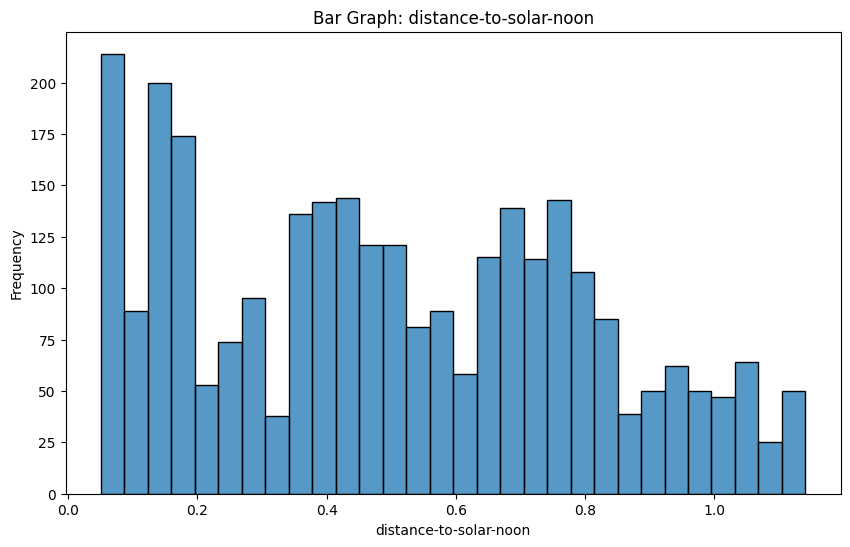

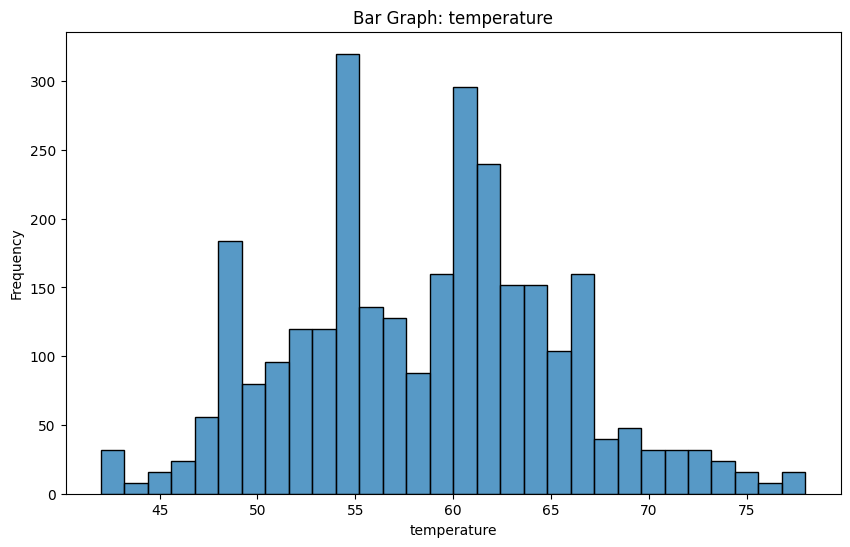

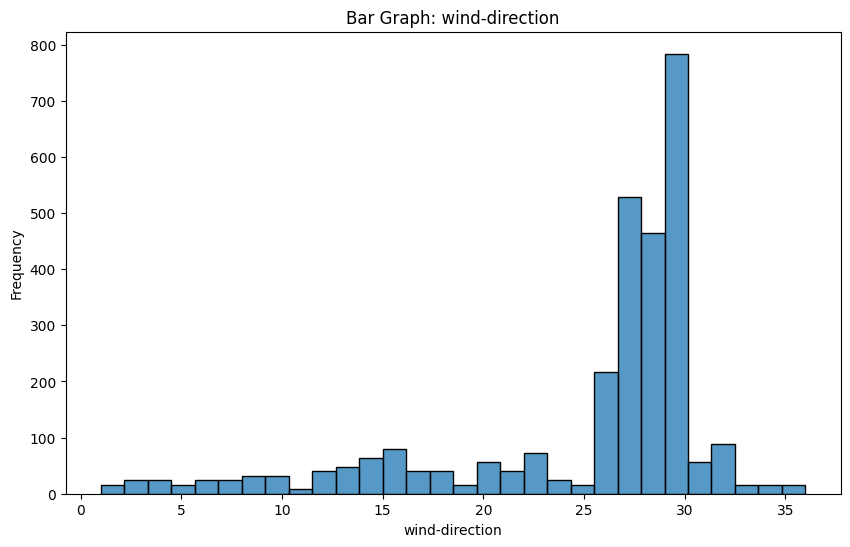

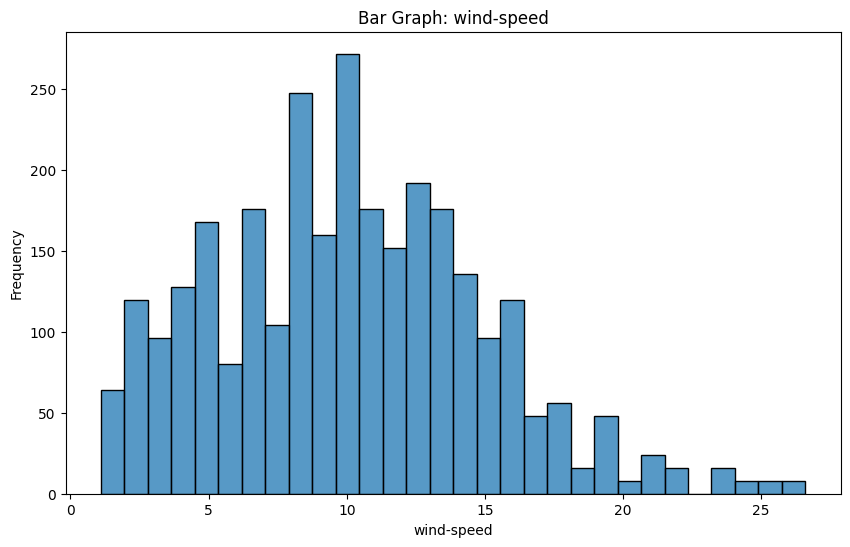

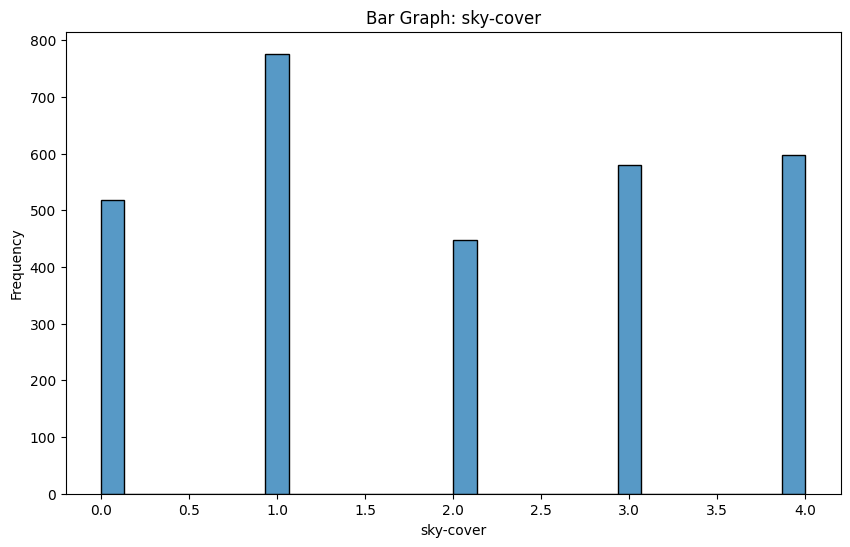

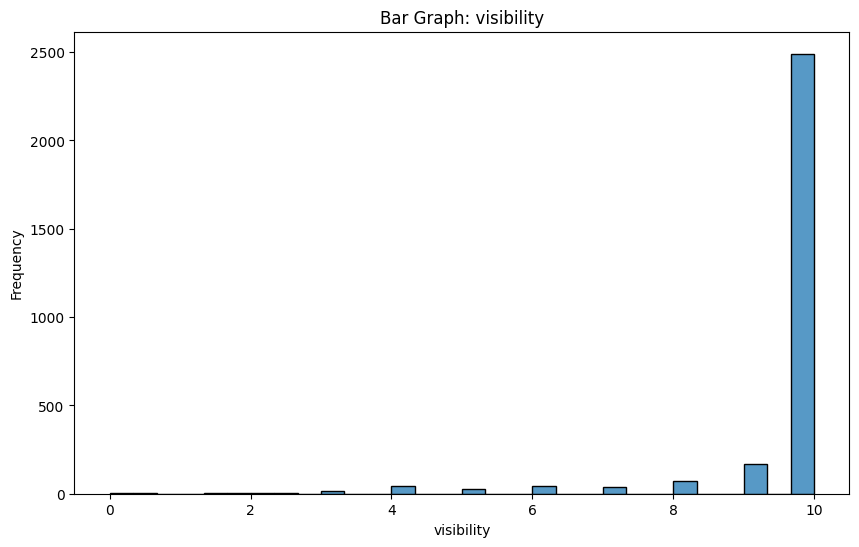

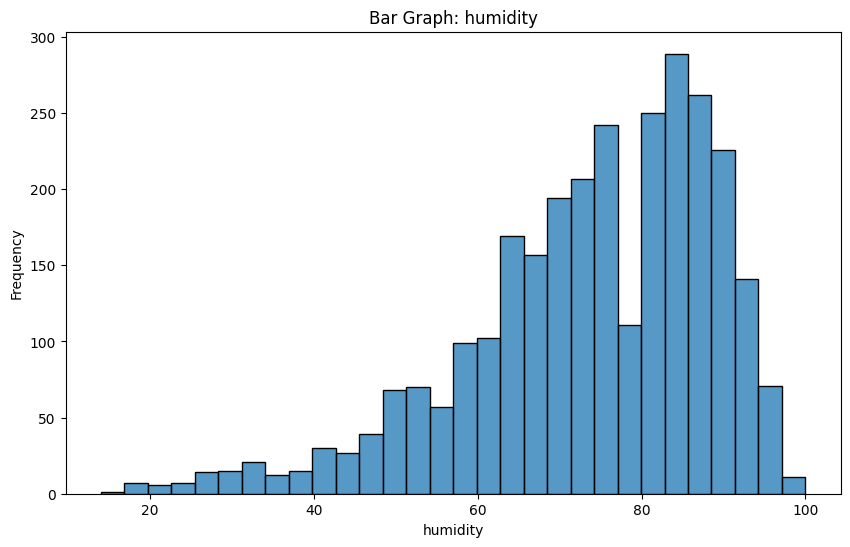

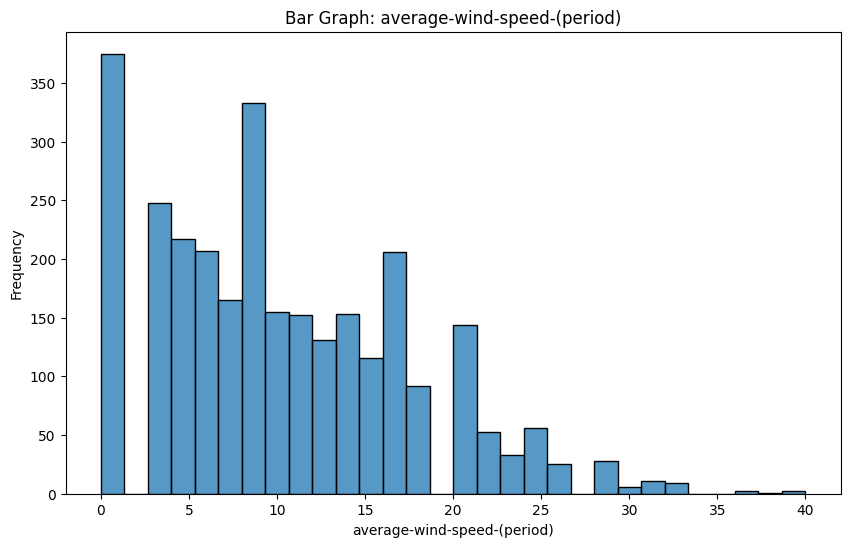

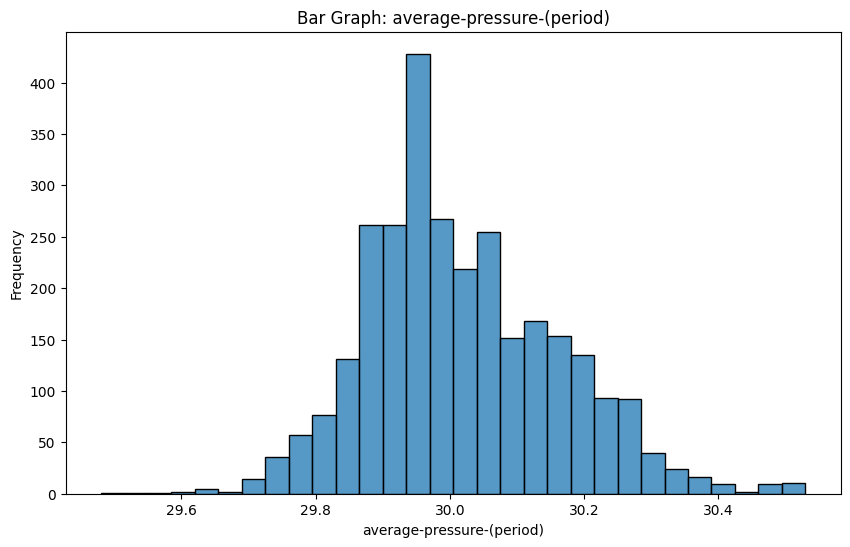

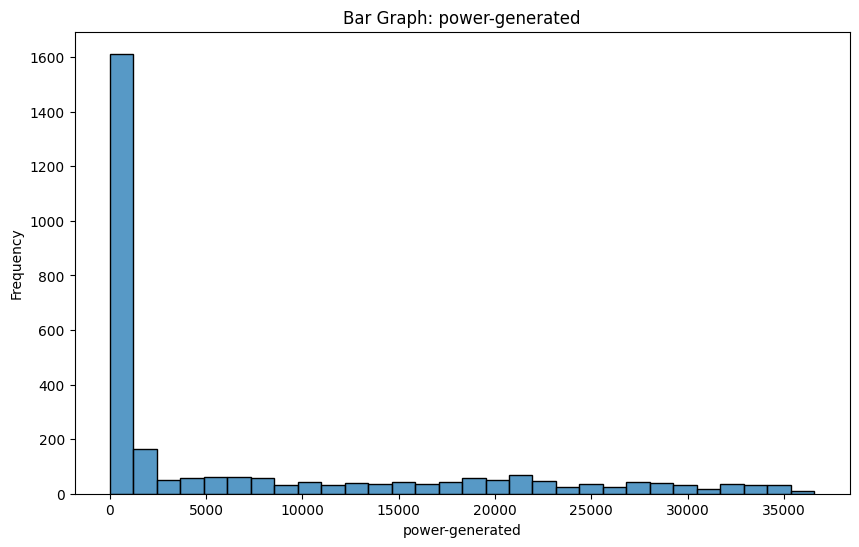

In [54]:

# Create bar plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=30, kde=False)
    plt.title('Bar Graph: ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

<ipython-input-55-ffde4c11fc8b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], shade=True)


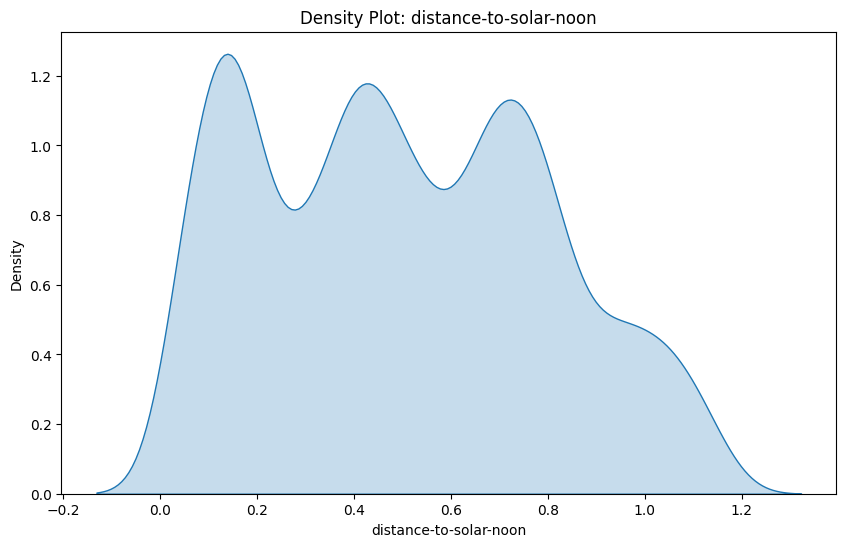

<ipython-input-55-ffde4c11fc8b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], shade=True)


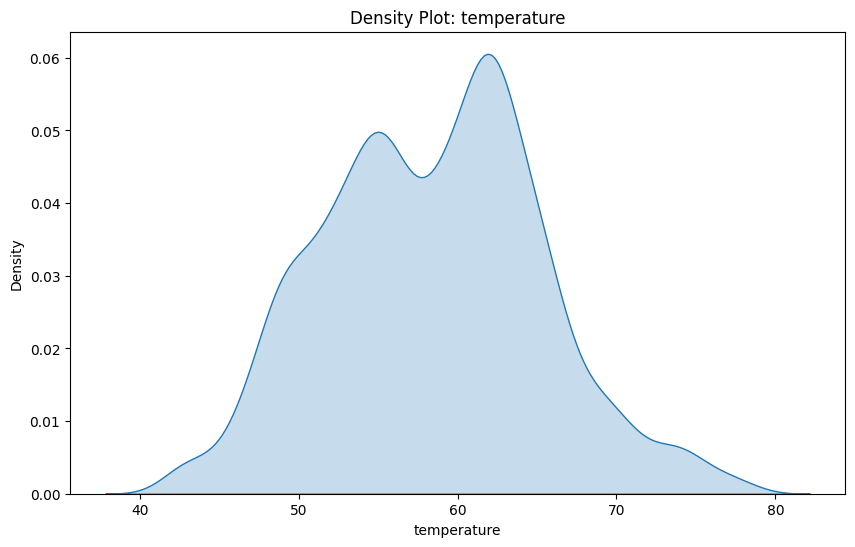

<ipython-input-55-ffde4c11fc8b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], shade=True)


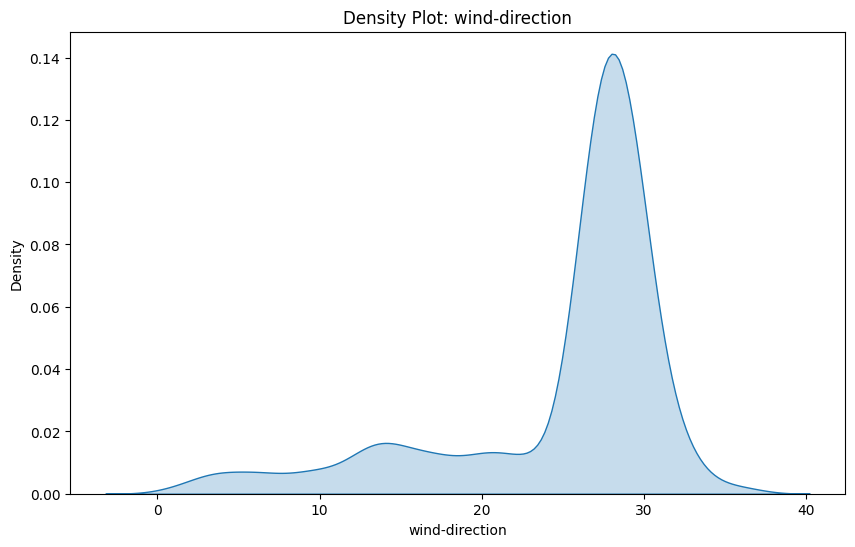

<ipython-input-55-ffde4c11fc8b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], shade=True)


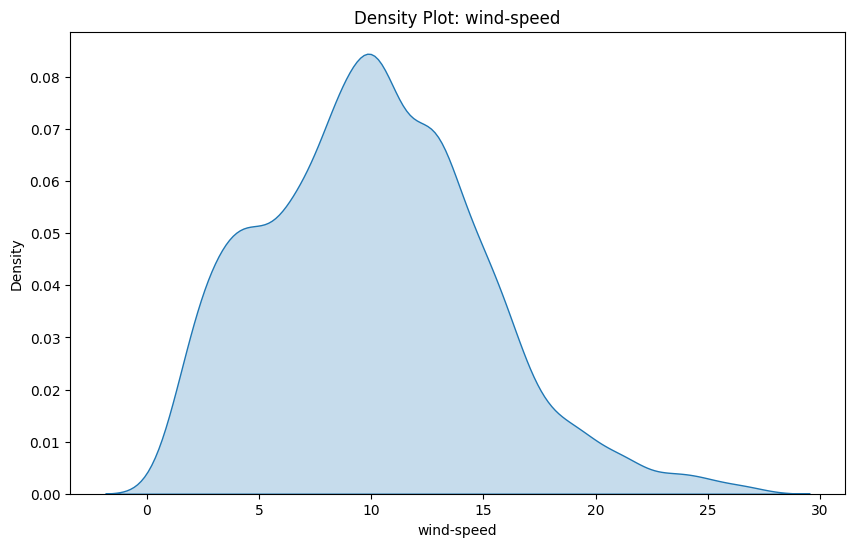

<ipython-input-55-ffde4c11fc8b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], shade=True)


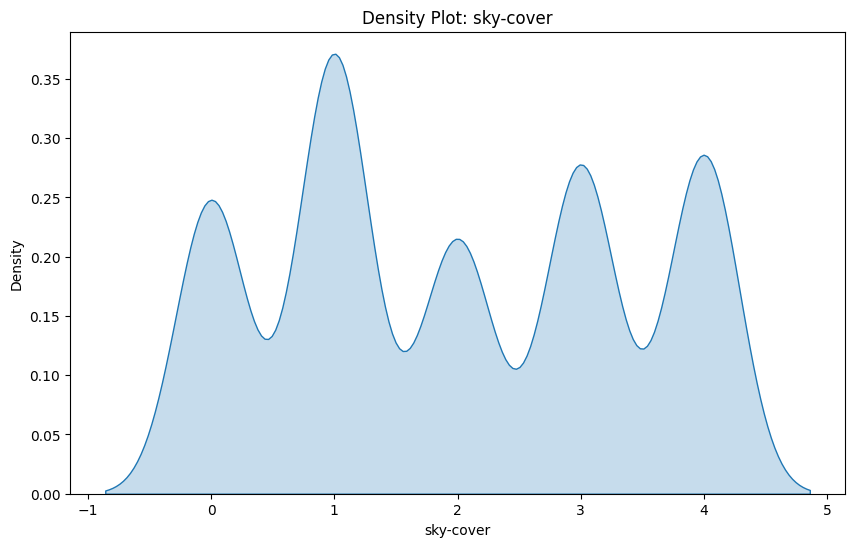

<ipython-input-55-ffde4c11fc8b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], shade=True)


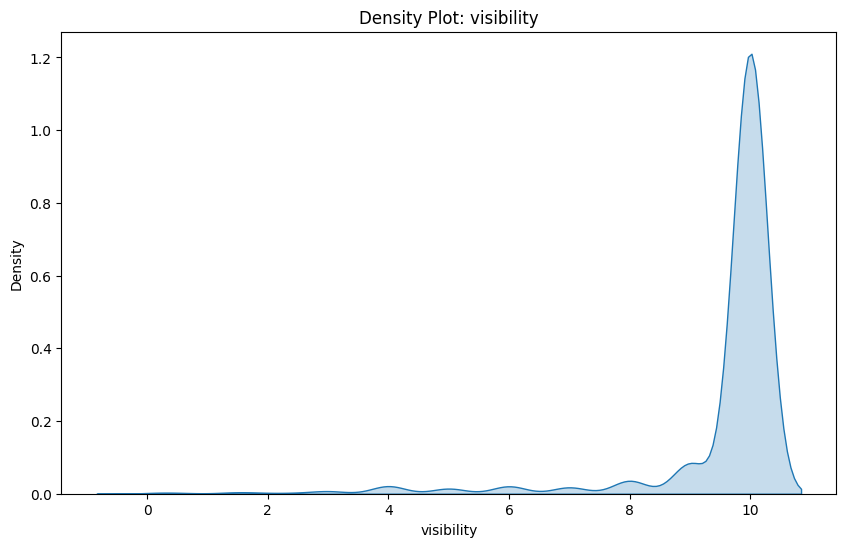

<ipython-input-55-ffde4c11fc8b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], shade=True)


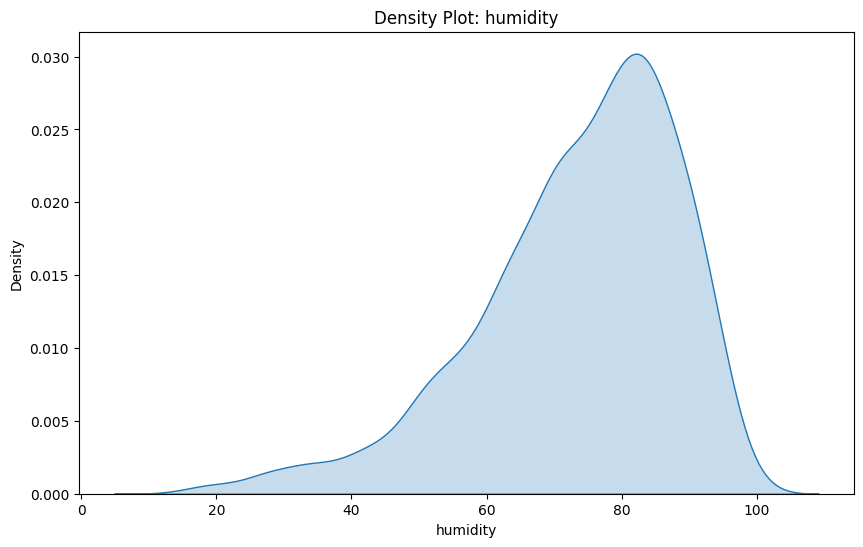

<ipython-input-55-ffde4c11fc8b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], shade=True)


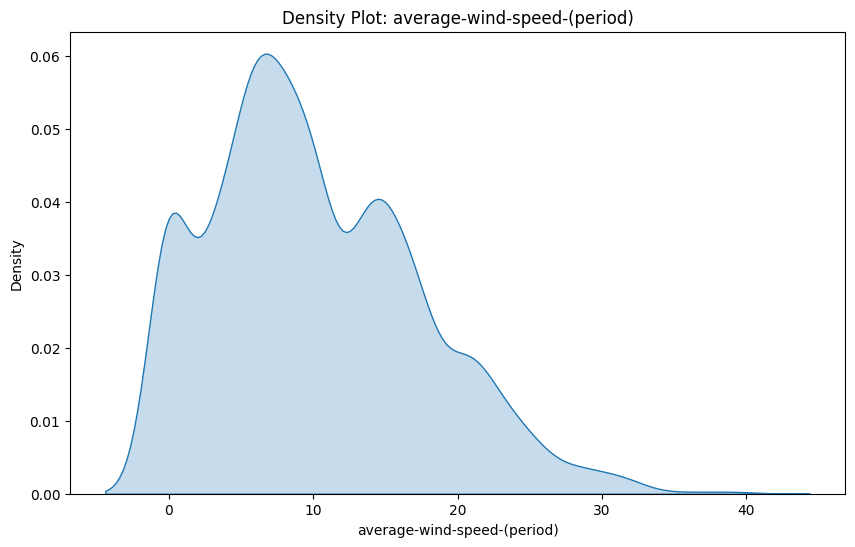

<ipython-input-55-ffde4c11fc8b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], shade=True)


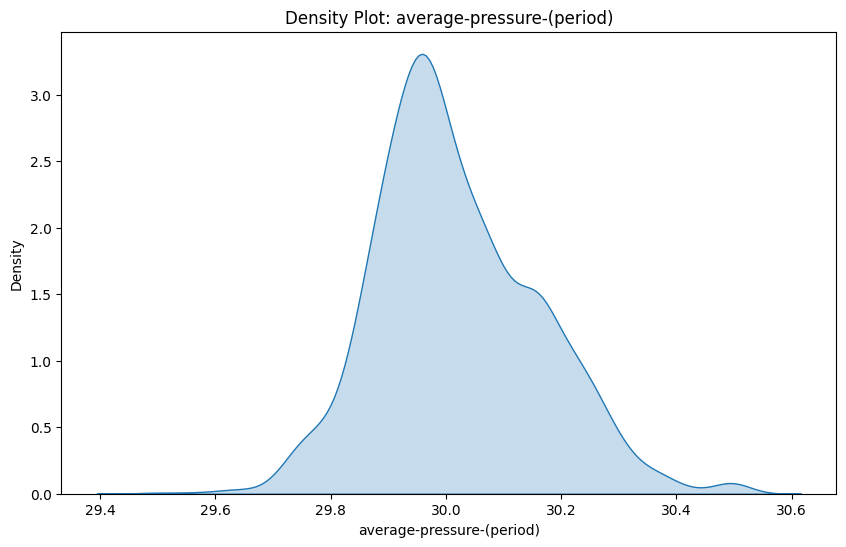

<ipython-input-55-ffde4c11fc8b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], shade=True)


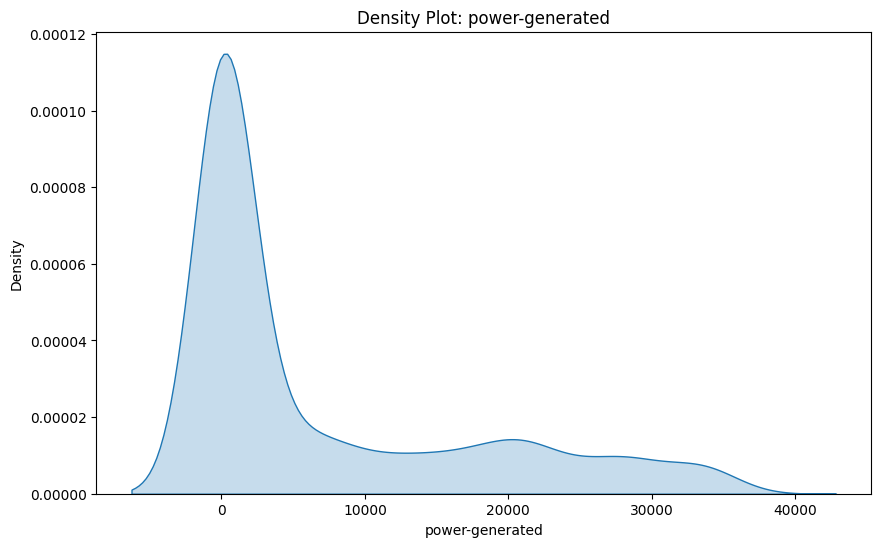

In [55]:
# Create density plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df[column], shade=True)
    plt.title(f'Density Plot: {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

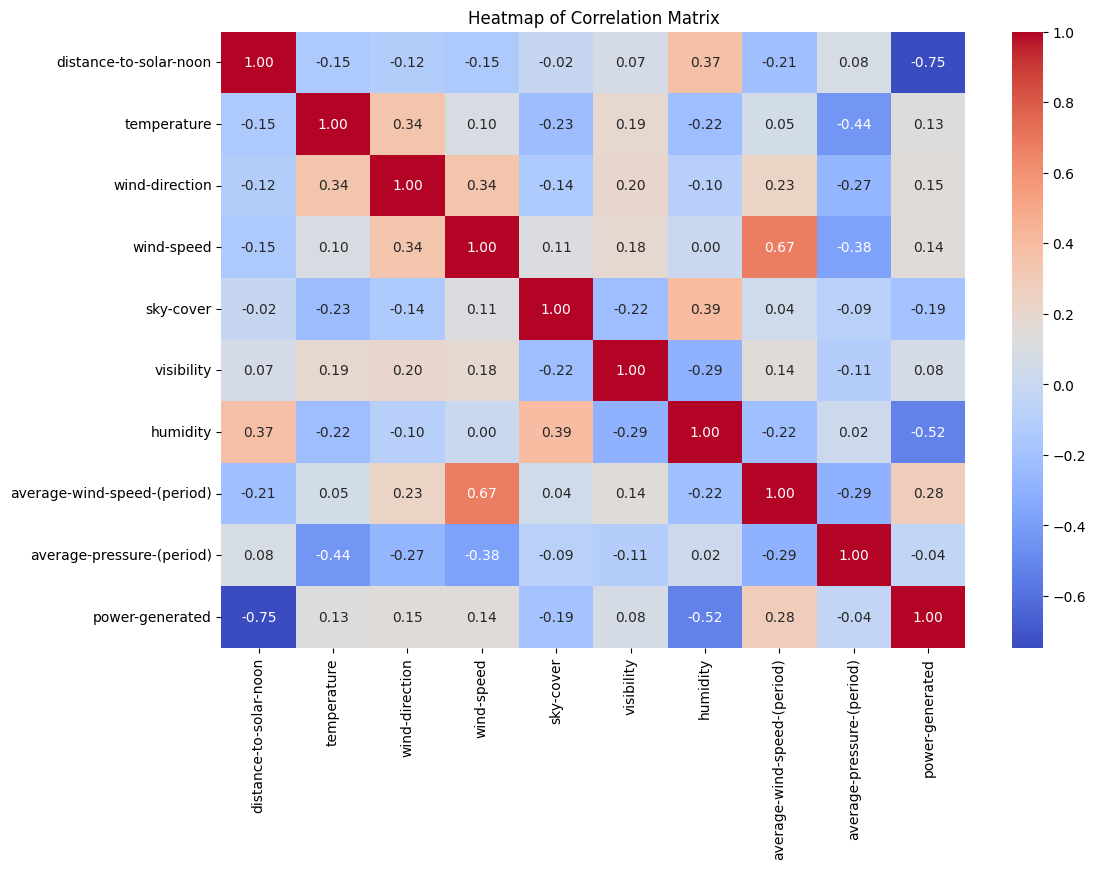

In [56]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [57]:
# Standardization scaling

x = df.drop('power-generated',axis=1)
x

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
2                   0.397172           69              28         7.5   
3                   0.165810           69              28         7.5   
4                   0.065553           69              28         7.5   
...                      ...          ...             ...         ...   
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
0             0        10.0        75                          8.0   
1             0        10.0        77                          5.0   
2             0        10.0        70                          0.0   
3             0        10.0        33                          0.0   
4             0        10.0        21                          3.0   
...         ...         ...       ...                          ...   
2915          4        10.0        75                         10.0   
2916          1        10.0        66                         15.0   
2917          2        10.0        68                         21.0   
2918          2        10.0        81                         17.0   
2919          1        10.0        81                         11.0   

      average-pressure-(period)  
0                         29.82  
1                         29.85  
2                         29.89  
3                         29.91  
4                         29.89  
...                         ...  
2915                      29.93  
2916                      29.91  
2917                      29.88  
2918                      29.87  
2919                      29.90  

[2920 rows x 9 columns]

In [58]:
y = df['power-generated']
y

0           0
1           0
2        5418
3       25477
4       30069
        ...  
2915     6995
2916    29490
2917    17257
2918      677
2919        0
Name: power-generated, Length: 2920, dtype: int64

In [59]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)
x


array([[ 1.19676525,  1.53968751,  0.440639  , ...,  0.09859668,
        -0.2932554 , -1.3928593 ],
       [ 0.4203095 ,  1.53968751,  0.440639  , ...,  0.23127056,
        -0.70653038, -1.18156419],
       [-0.35614625,  1.53968751,  0.440639  , ..., -0.23308801,
        -1.39532201, -0.89983737],
       ...,
       [-0.70073508,  0.66249821,  0.2960048 , ..., -0.36576189,
         1.49760285, -0.97026908],
       [ 0.07273813,  0.66249821,  0.2960048 , ...,  0.49661832,
         0.94656954, -1.04070078],
       [ 0.84621133,  0.66249821,  0.2960048 , ...,  0.49661832,
         0.12001958, -0.82940567]])